# colab 한글 깨짐 방지
- 실행후에 런타임 다시 시작할 것

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath).get_name()
fm._rebuild()

%config InlineBackend.figure_format = 'retina'

plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import pandas as pd
import numpy as np

# matplotlib
- 파이썬의 대표적인 과학 계산용 그래프 라이브러리
- plt.figure : 축과 그래프, 그래프의 제목들을 표시하는 컨테이너
- plt.axes : 눈금과 레이블, 그래프가 있는 테두리 박스로 시각화 형성

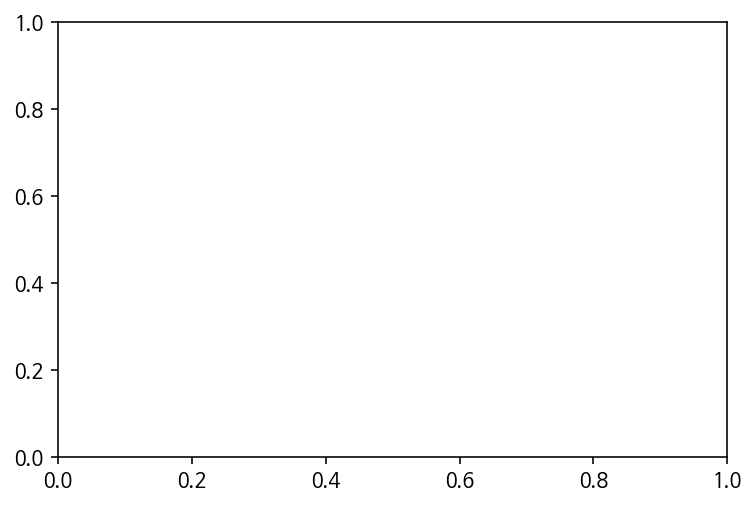

In [ ]:
plt.figure() # 도화지를 만든다
plt.axes() # 도화지 안 그래프들을 그린다
plt.show() # 실제화면 표시

## 단일 그래프

- plot 함수
    - line plot을 그려주는 함수
    - figure, axes 객체가 없다면 이를 만들어서 그려줌.
    

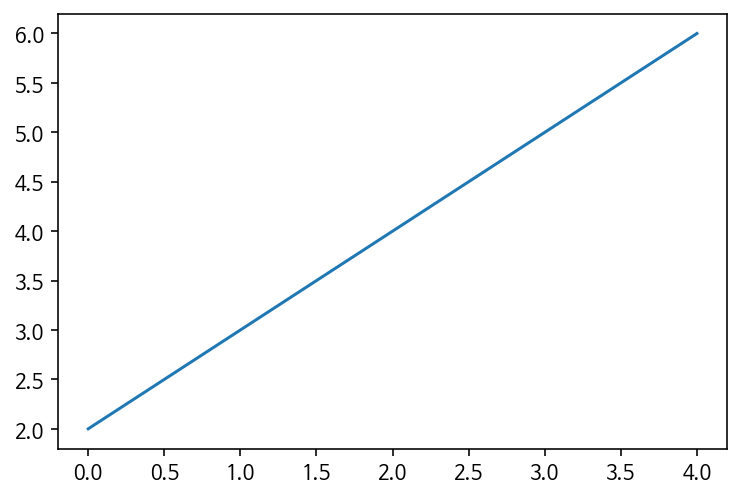

In [ ]:
plt.plot(np.arange(2,7)) # x축은 index번호
plt.show()

## 다중 그래프
- 1개의 axes 안에 여러개의 그래프를 그린다.

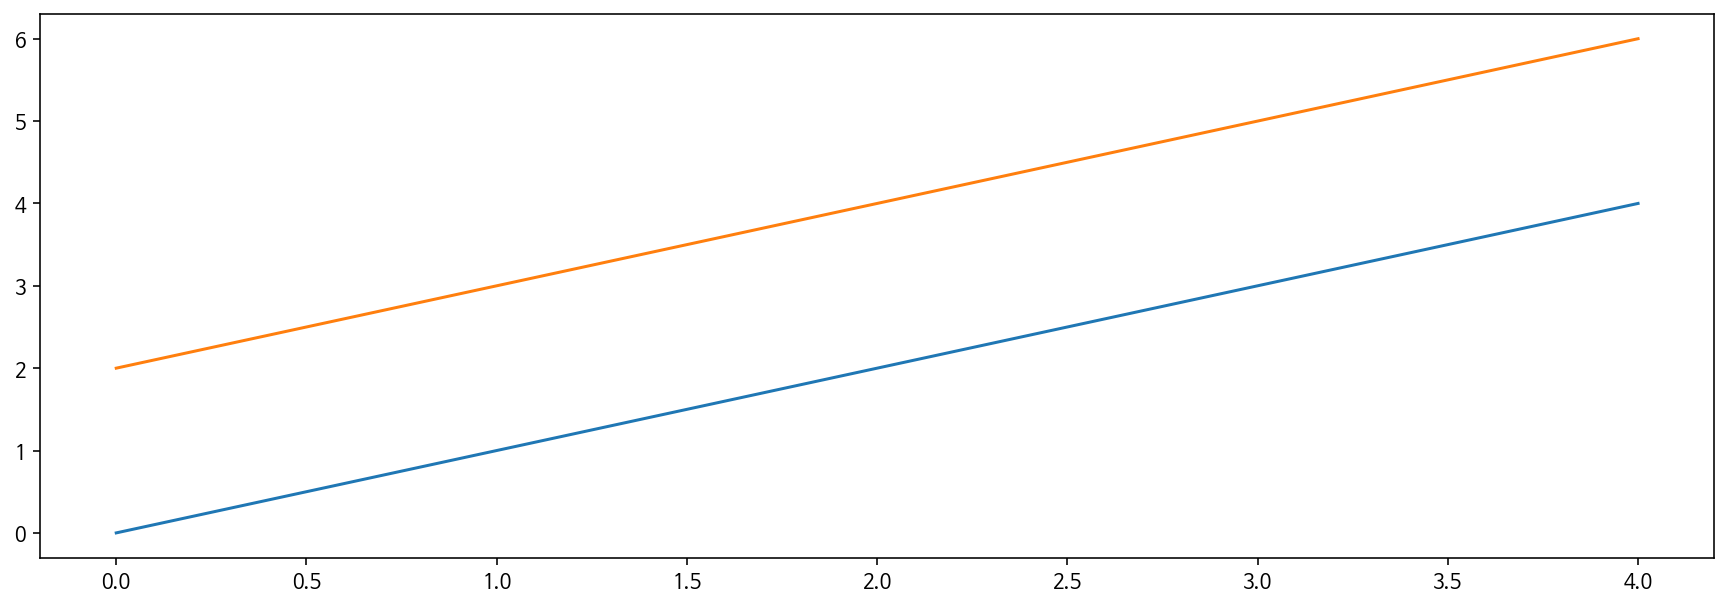

In [ ]:
plt.figure(figsize = [15,5]) # 넓이, 높이 (inch 단위)
plt.plot(np.arange(5))
plt.plot(np.arange(2,7))
plt.show()

## subplots 함수를 이용하여 axes 여러개 그리기
- 함수를 실행하면 figure, axes 객체가 반환된다.

(2, 2)


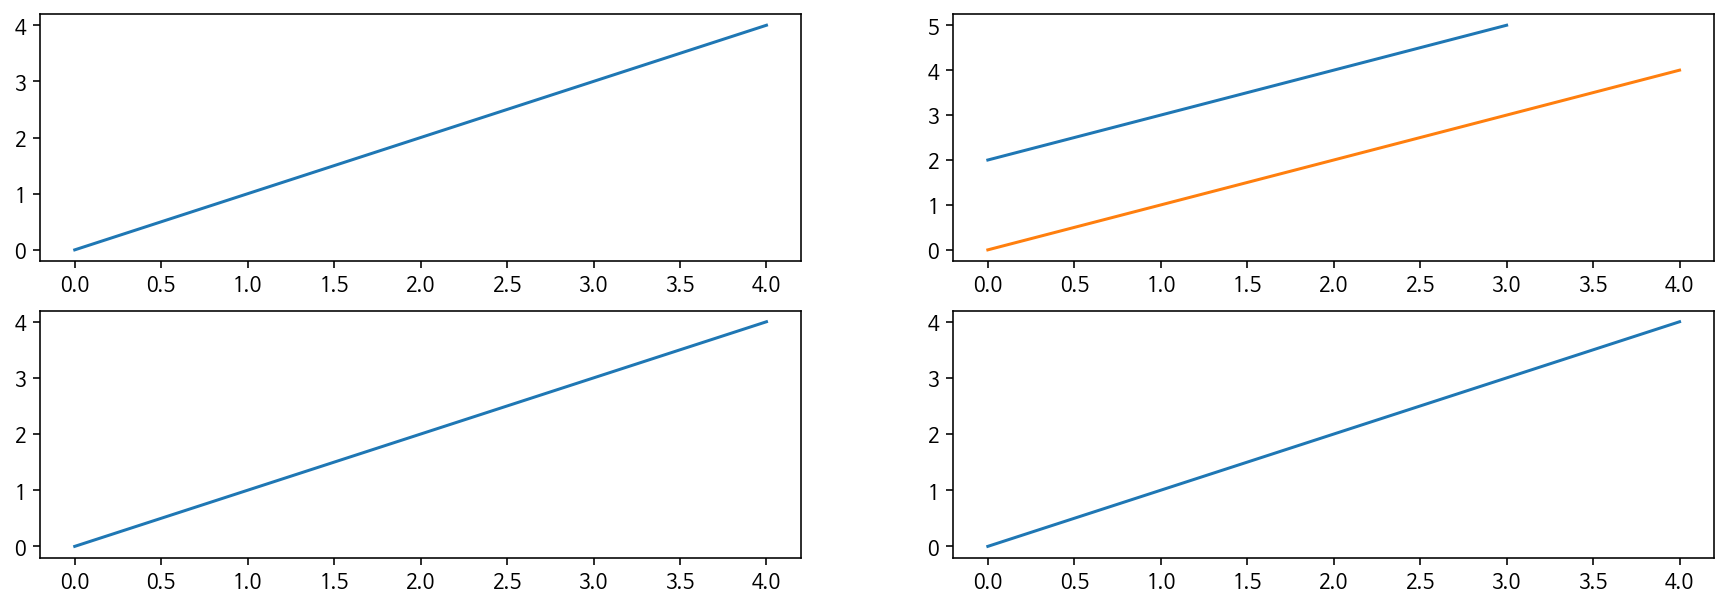

In [ ]:
fig,ax = plt.subplots(2,2,figsize=[15,5]) # 2행 2열
print(ax.shape)
ax[0,0].plot(np.arange(5))

ax[0,1].plot(np.arange(2,6))
ax[0,1].plot(np.arange(5))

ax[1,0].plot(np.arange(5))
ax[1,1].plot(np.arange(5))
plt.show()

- 다른방식

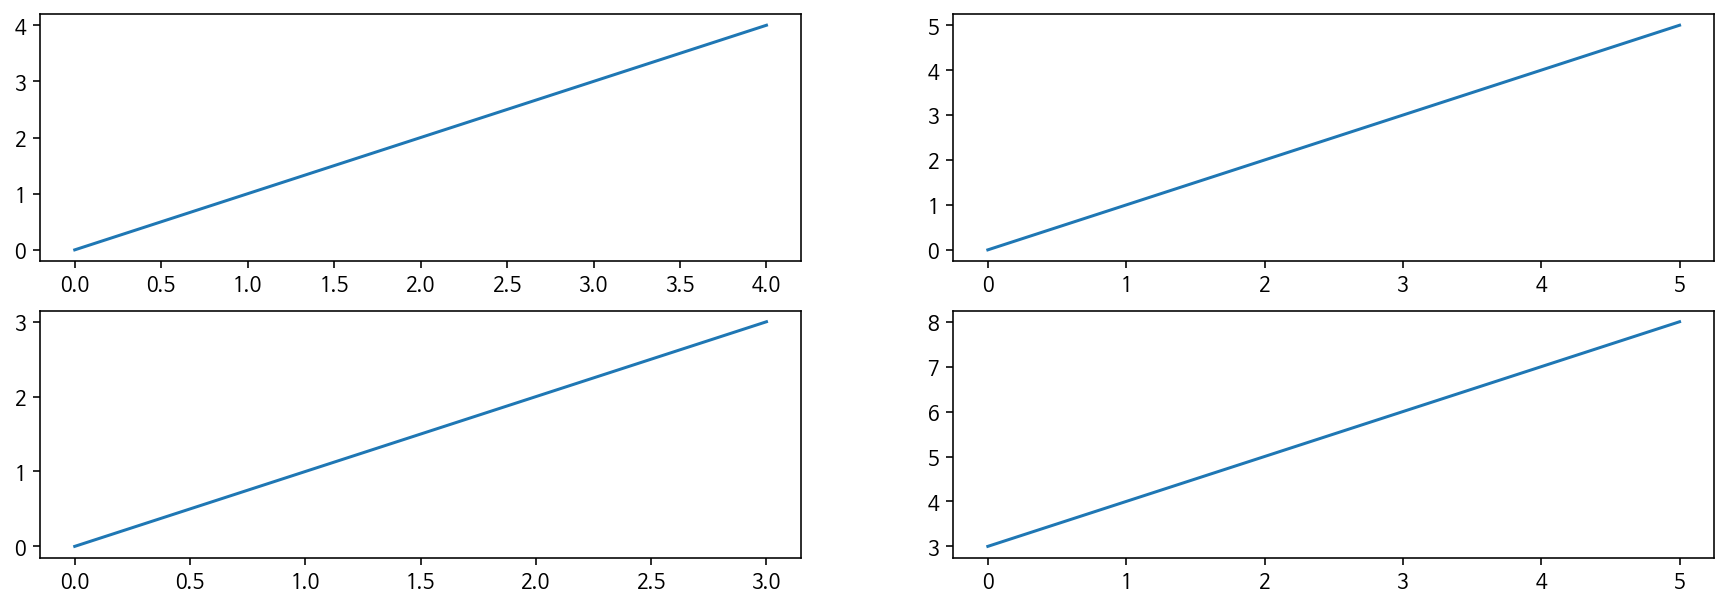

In [ ]:
plt.figure(figsize=[15,5])
plt.subplot(2,2,1) # 2행2열 첫번째부터 그린다. subplots X
plt.plot(np.arange(5))

plt.subplot(2,2,2)
plt.plot(np.arange(6))

plt.subplot(2,2,3)
plt.plot(np.arange(4))

plt.subplot(2,2,4)
plt.plot(np.arange(3,9))

plt.show()

- 쉼표 지워도 된다.

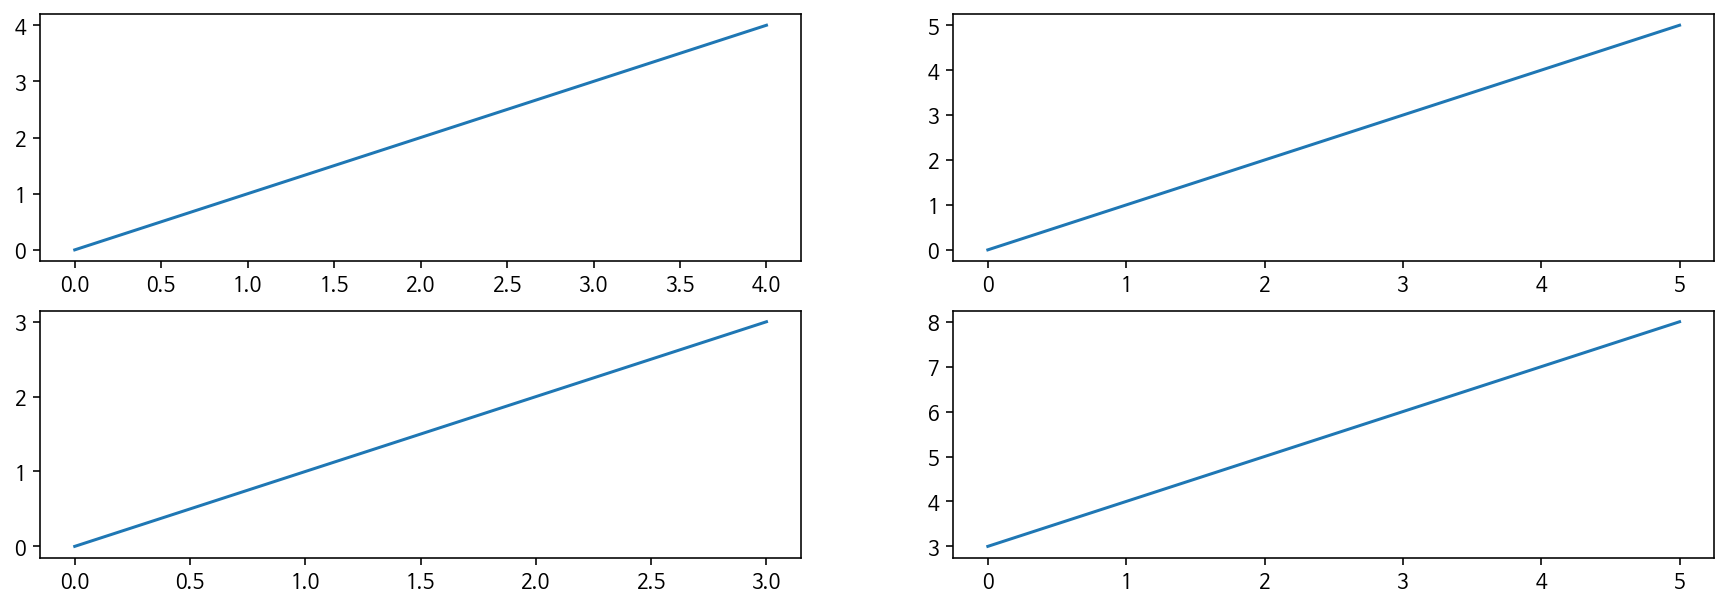

In [ ]:
plt.figure(figsize=[15,5])
plt.subplot(221) 
plt.plot(np.arange(5))

plt.subplot(222)
plt.plot(np.arange(6))

plt.subplot(223)
plt.plot(np.arange(4))

plt.subplot(224)
plt.plot(np.arange(3,9))

plt.show()

## 타이틀 설정하기
- figure 객체의 제목은 suptitle 메소드
- axes 객체의 제목은 set_title 메소드

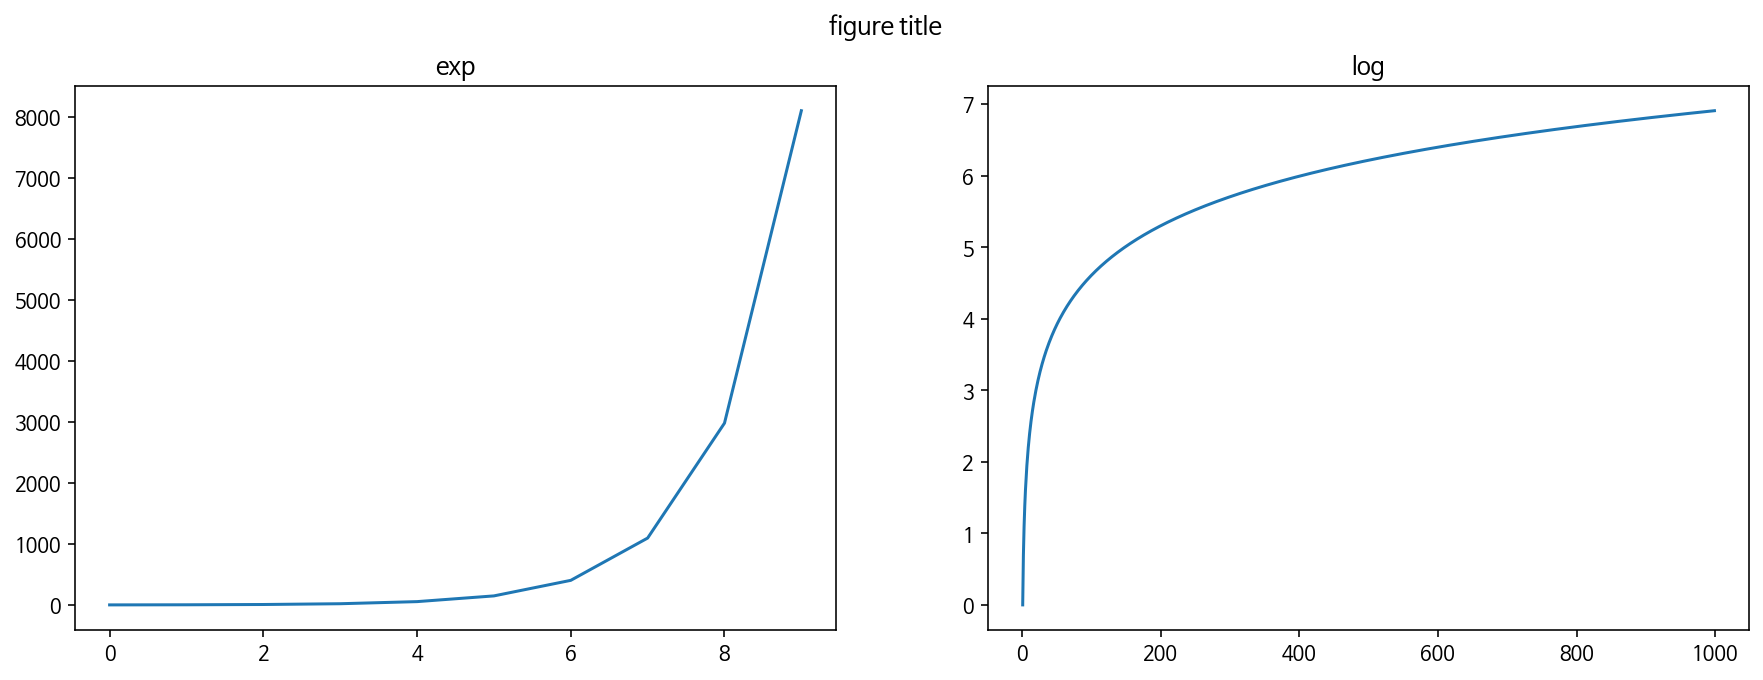

In [ ]:
fig,ax = plt.subplots(1,2,figsize=[15,5])
fig.suptitle("figure title")

x = range(0,10) # x축
y = np.exp(x) # y축
ax[0].plot(x,y)
ax[0].set_title("exp")

x = range(1,1000) # x축
y = np.log(x) # y축
ax[1].plot(x,y)
ax[1].set_title("log")

plt.show()

## x와 y축에 이름넣기
- axes 객체의 set_xlabel, set_ylabel 메소드를 사용

In [ ]:
x = range(1,1000)
y = np.log(x)

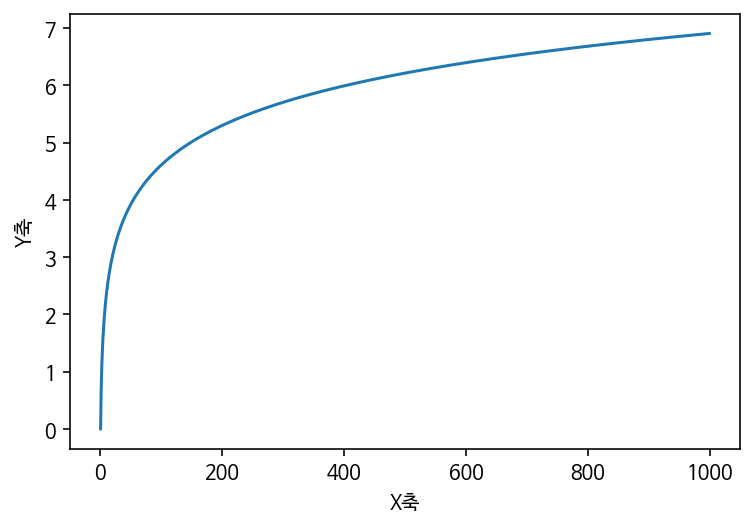

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlabel("X축")
ax.set_ylabel("Y축")
plt.show()

## 눈금 회전하기
- axes 객체의 tick_params 메소드

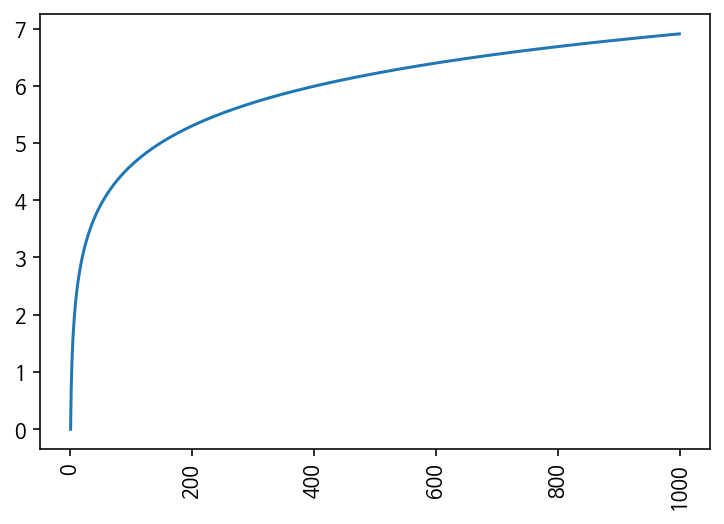

In [ ]:
fig,ax = plt.subplots()
ax.plot(x,y)
ax.tick_params(axis="x", labelrotation=90)
plt.show()

## x와 y축 눈금 지정하기
- axes 객체의 set_xticks, set_yticks 메소드

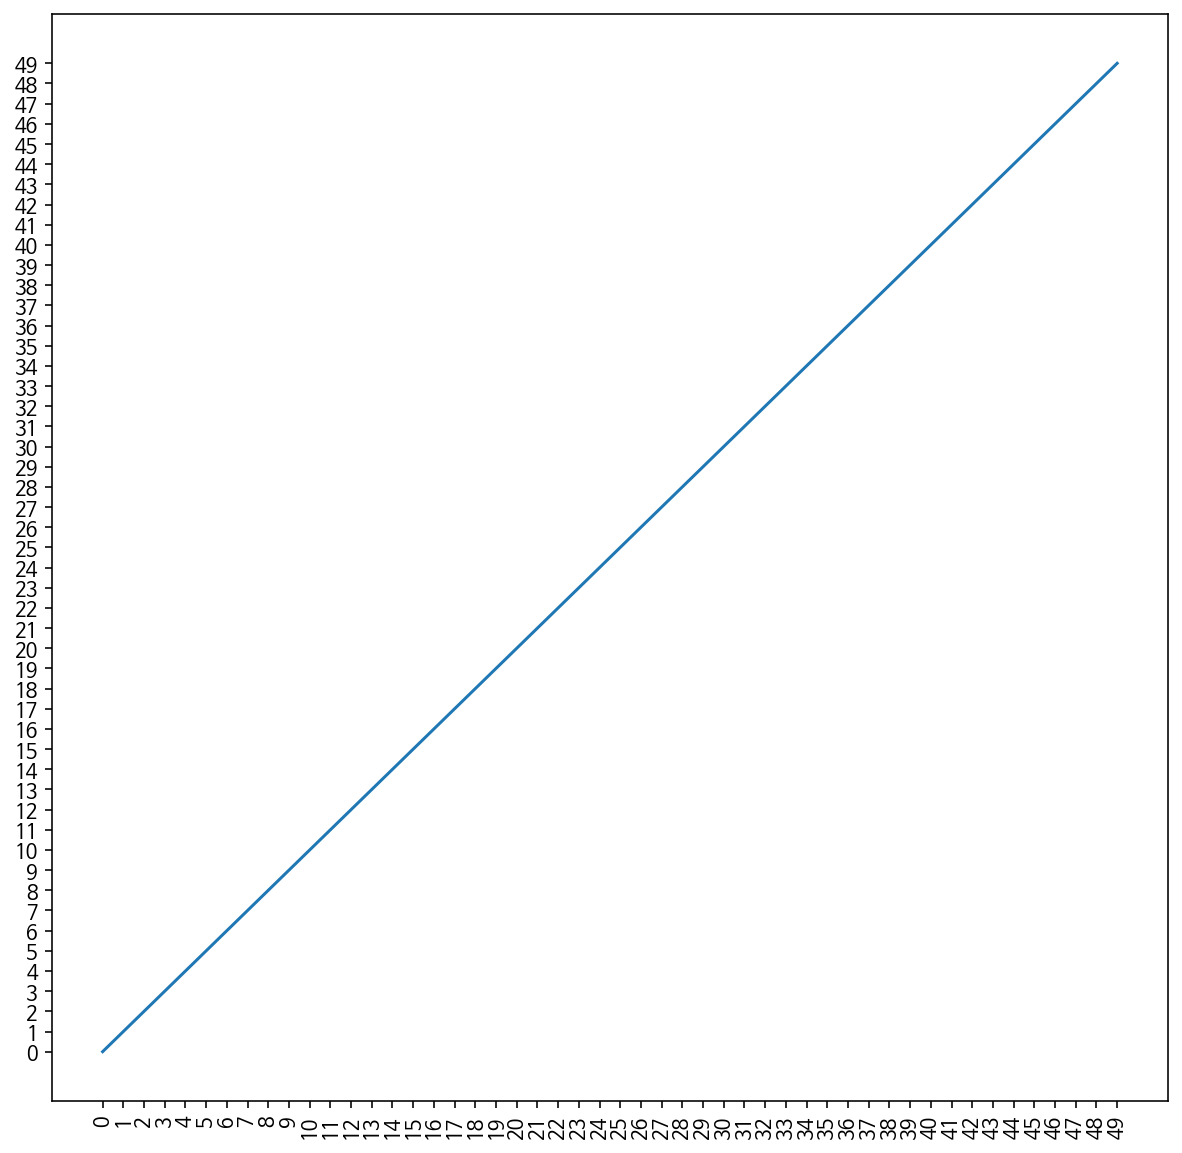

In [ ]:
fig,ax = plt.subplots(figsize=[10,10])
ax.plot(range(50))
ax.set_xticks(range(50)) # x축 label 
ax.set_yticks(range(50)) # y축 label
ax.tick_params(axis="x",labelrotation=90)
plt.show()

## Markers, line style, color 변경하기
- plot 함수에 아규먼트를 지정해주면 된다.

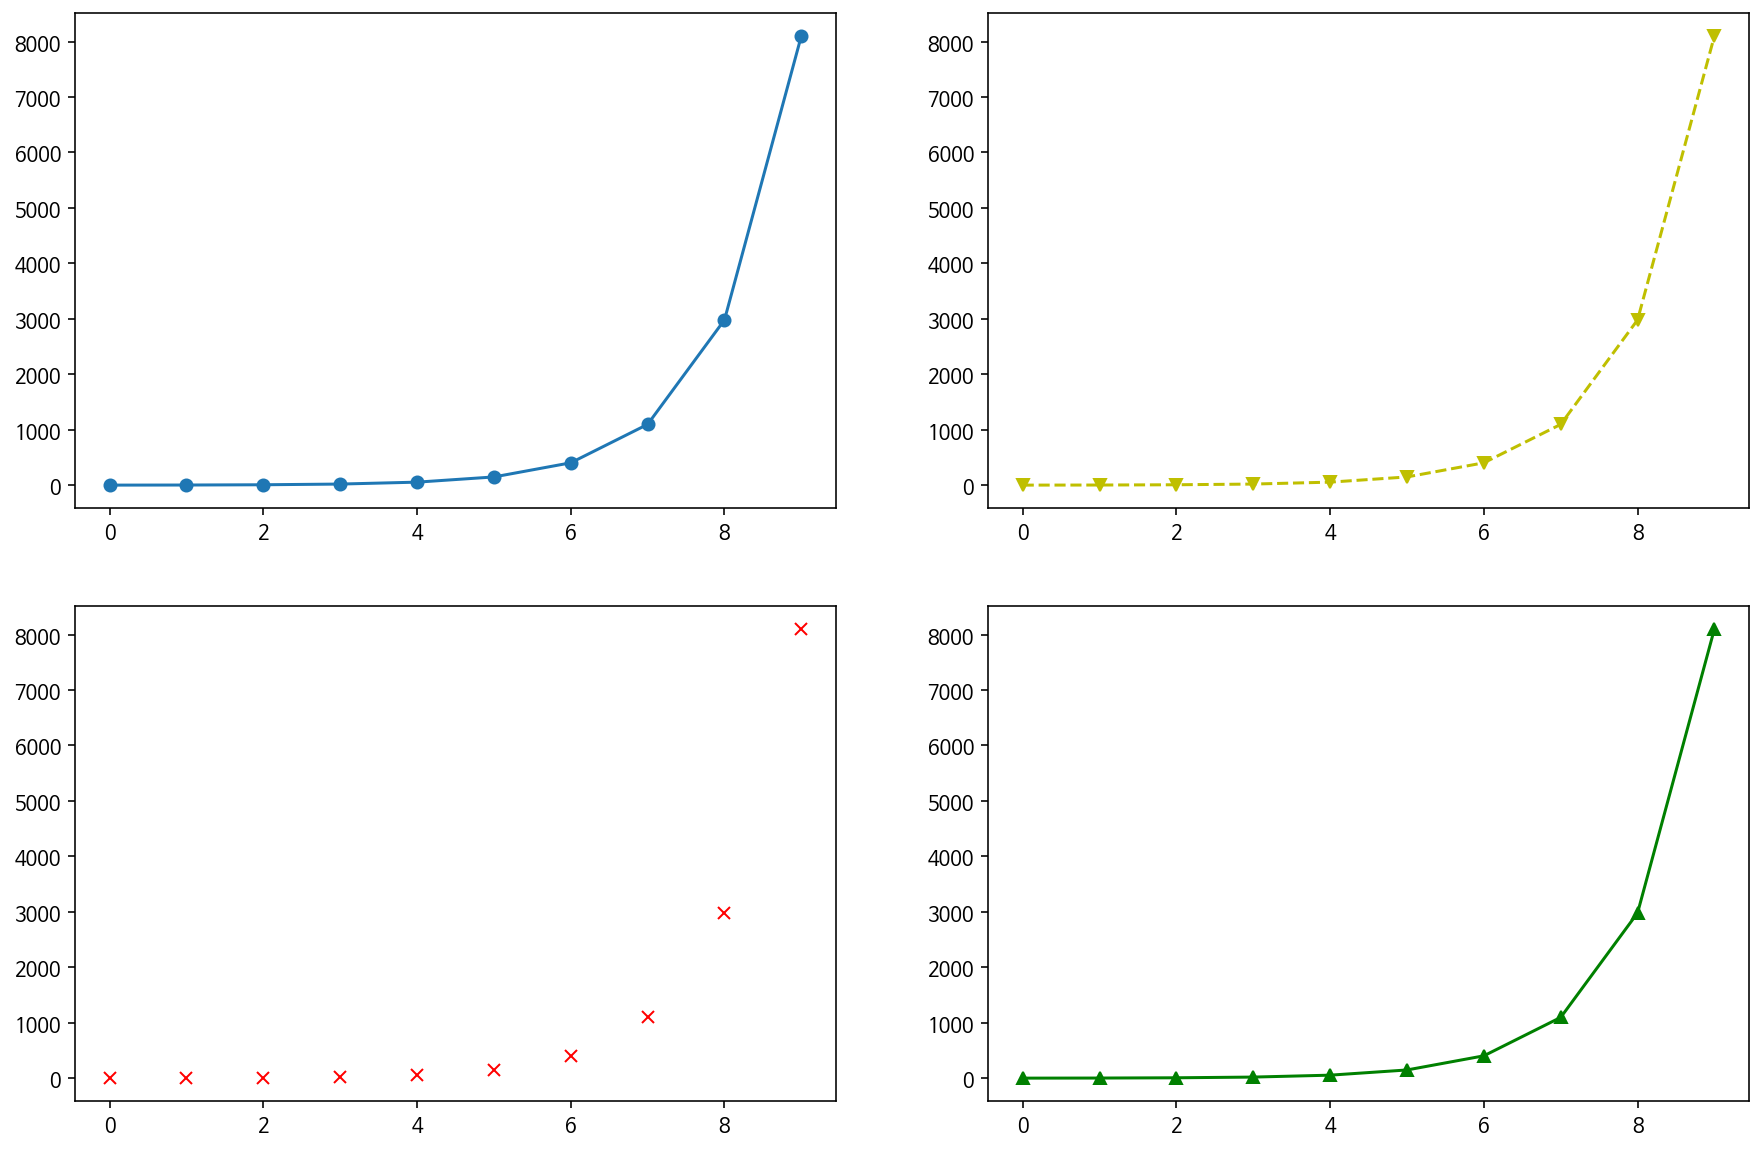

In [ ]:
y = np.exp(range(0,10))

fig,ax = plt.subplots(2,2,figsize=[15,10])
ax[0,0].plot(y,marker="o") # "o" => 원 형태
ax[0,1].plot(y,marker="v",linestyle="--",color="y") # 역삼각형, 노란색
ax[1,0].plot(y,marker="x",linestyle="",color="r") 
ax[1,1].plot(y,marker="^",color="g")

plt.show()

## 범례 정의하기
- legend 메소드

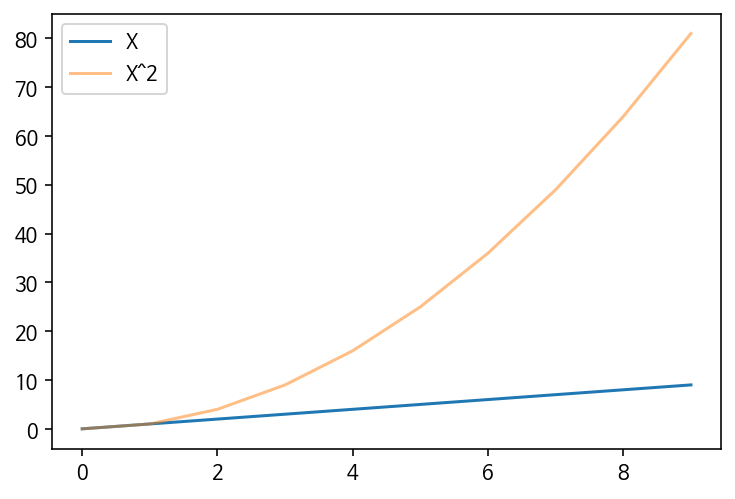

In [ ]:
fig,ax = plt.subplots()
x = np.arange(10)
ax.plot(x)
ax.plot(x**2,alpha=0.5) # alpha = 투명도 0~1 사이값
ax.legend(["X","X^2"]) 
plt.show()

# 데이터 불러오기

In [ ]:
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.columns = ["지불금액","팁금액","성별","흡연자","요일","식사시간","인원수"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   지불금액    244 non-null    float64 
 1   팁금액     244 non-null    float64 
 2   성별      244 non-null    category
 3   흡연자     244 non-null    category
 4   요일      244 non-null    category
 5   식사시간    244 non-null    category
 6   인원수     244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# Line Plot
- 일반적으로 시간을 x축에 두고 y축 데이터에 추이를 볼때 사용

In [ ]:
tmp = df.groupby("요일").agg({"지불금액":"sum"}).reset_index()
tmp

,요일,지불금액
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


- 요일별 매출에 대한 추이 확인하기

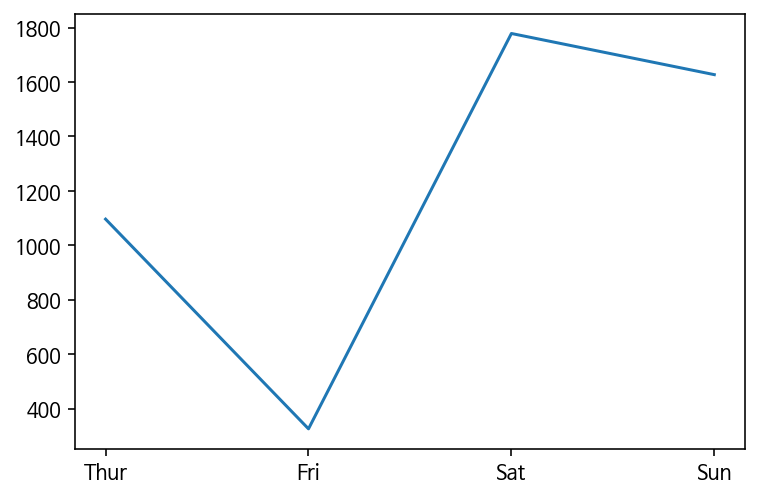

In [ ]:
fig,ax = plt.subplots()
ax.plot(tmp["요일"],tmp["지불금액"])
plt.show()

- 요일별 평균 지불금액에 추이를 확인해보자

In [ ]:
tmp = df.groupby("요일").agg({"지불금액":"mean"}).reset_index()
tmp

,요일,지불금액
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


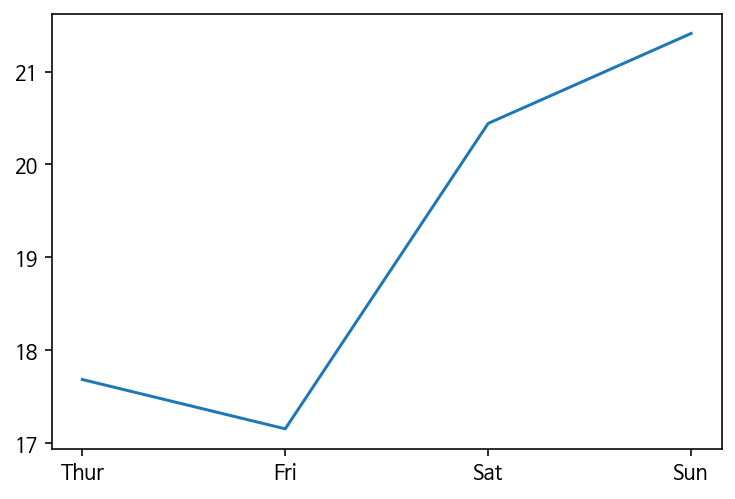

In [ ]:
fig,ax = plt.subplots()
ax.plot(tmp["요일"],tmp["지불금액"])
plt.show()

# Scatter Plot
- 산점도 그래프
- 두 변수 사이의 관계를 확인할 때 사용

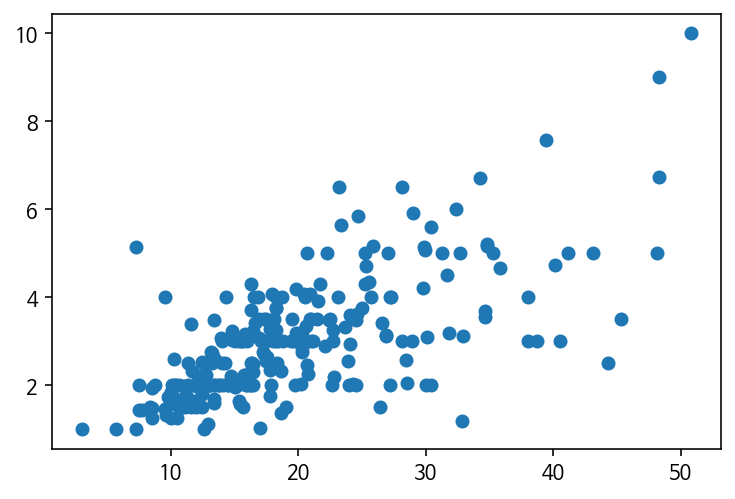

In [ ]:
fig,ax = plt.subplots()
ax.scatter(df["지불금액"],df["팁금액"])
plt.show()

# Barplot, Barhplot
- 범주형 변수에 대한 집계를 시각화
- 개수 비교할 때 사용

In [ ]:
df["요일"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: 요일, dtype: int64

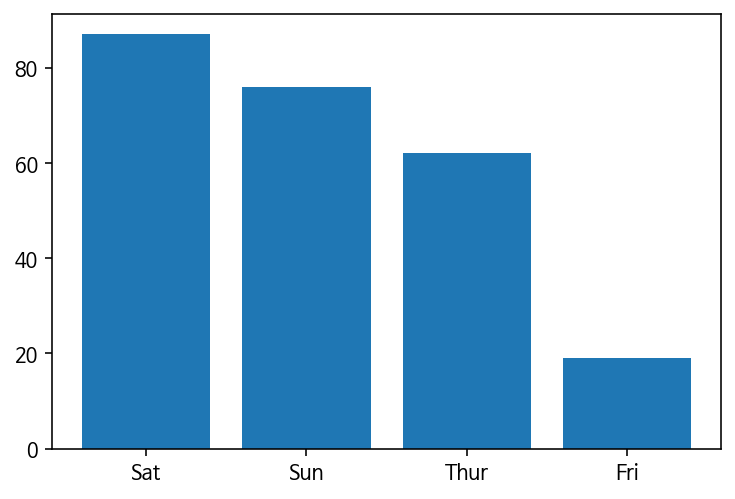

In [ ]:
fig,ax = plt.subplots()
ax.bar(df["요일"].value_counts().index, df["요일"].value_counts()) # barh ==> 가로로 표시
plt.show()

```
요일별 저녁타임식사의 총횟수를 barplot으로 시각화 하시오
```

In [ ]:
df["식사시간"].value_counts()

Dinner    176
Lunch      68
Name: 식사시간, dtype: int64

In [ ]:
tmp = df.groupby("요일").agg({"식사시간":lambda x:(x=="Dinner").sum() }).reset_index()
tmp

,요일,식사시간
0,Thur,1
1,Fri,12
2,Sat,87
3,Sun,76


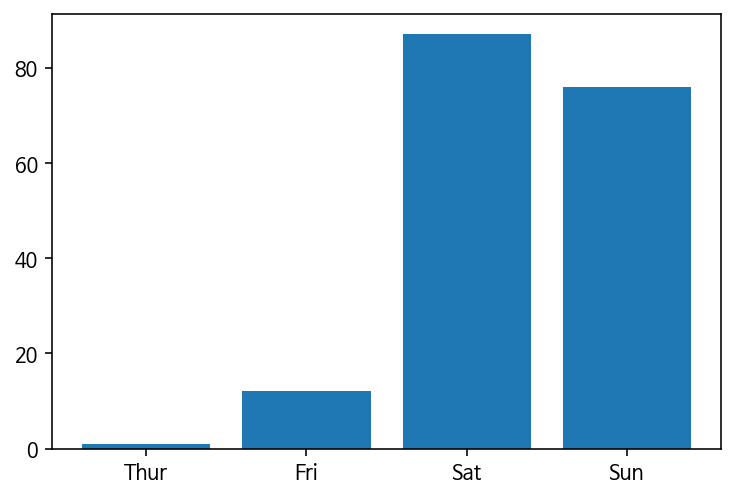

In [ ]:
fig,ax = plt.subplots()
ax.bar(tmp["요일"],tmp["식사시간"])
plt.show()

# Pie Chart
- 원 그래프
- 전체에 대한 각 부분의 비율을 부채꼴 모양으로 나타낸 그래프

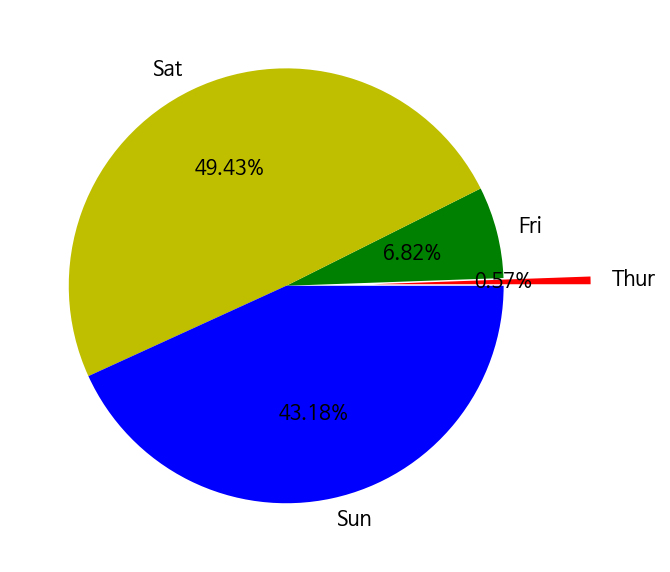

In [ ]:
fig,ax = plt.subplots(figsize=[7,5])

ax.pie(
    tmp["식사시간"],
    labels = tmp["요일"],
    colors=["r","g","y","b"],
    explode=[0.4,0,0,0],
    autopct='%.2f%%'

)

plt.show()

# Histogram
- 수치형 데이터 구간의 빈도수를 볼때 사용


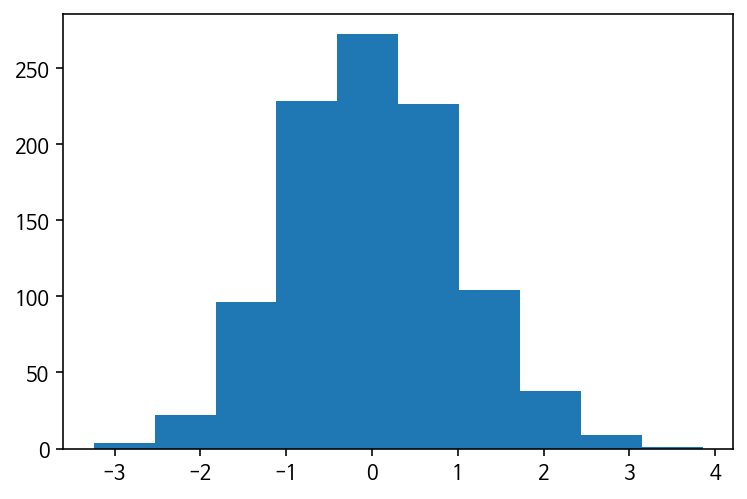

In [ ]:
np.random.seed(42)
arr = np.random.randn(1000)
fig,ax = plt.subplots()
ax.hist(arr)
plt.show()

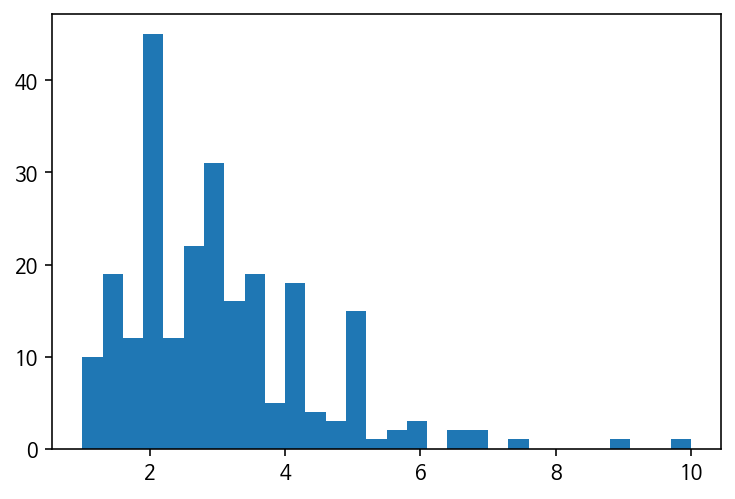

In [ ]:
fig,ax = plt.subplots()
ax.hist(df["팁금액"], bins = 30) # bins = 구간의 개수
plt.show()

# Box Plot
- 4분위수를 기준으로 데이터의 최대,최소,Q1(25%),Q2(50%),Q3(75%)등 통계적인 부분을 시각화
- 이상치를 쉽게 파악할수 있다.
- IQR(Inter Quantile Range)
    - Q3 - Q1
- Box Plot 최대값: Q3 + IQR*1.5
- Box Plot 최소값: Q1 - IQR*1.5
- Box Plot에서는 최소값과 최대값을 벗어나면 이상치로 판단한다.

In [ ]:
np.arange(0,1,0.25)

array([0.  , 0.25, 0.5 , 0.75])

In [ ]:
q_arr = df["팁금액"].quantile(np.arange(0,1.1,0.25)).to_numpy()
q_arr

array([ 1.    ,  2.    ,  2.9   ,  3.5625, 10.    ])

In [ ]:
iqr = q_arr[3] - q_arr[1]
box_min = q_arr[1] - iqr*1.5 # Box Plot의 최소값
box_max = q_arr[3] + iqr*1.5 # Box Plot의 최대값
iqr, box_min, box_max

(1.5625, -0.34375, 5.90625)

In [ ]:
yticks = np.concatenate([
    q_arr,[iqr,box_min,box_max]
])
yticks

array([ 1.     ,  2.     ,  2.9    ,  3.5625 , 10.     ,  1.5625 ,
       -0.34375,  5.90625])

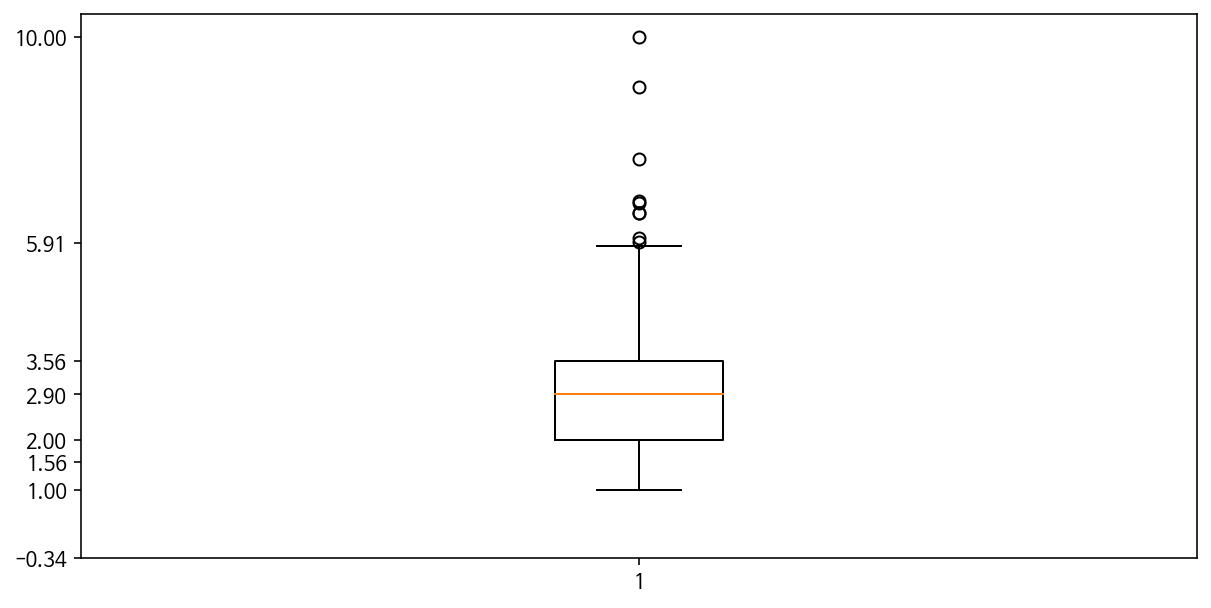

In [ ]:
fig,ax = plt.subplots(figsize=[10,5])
ax.boxplot(df["팁금액"])
ax.set_yticks(yticks)
plt.show()